In [3]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 

In [4]:
weight = 0.7 
bias = 0.3 

start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
# print(X[:10])
y = weight * X + bias 
# print(y[:10])

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    # plt.figure(figsize=(10,10))
    plt.scatter(train_data, train_labels, label='Train')
    plt.scatter(test_data, test_labels, c='g', label = 'Test')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predict')

    plt.legend()
    plt.show()



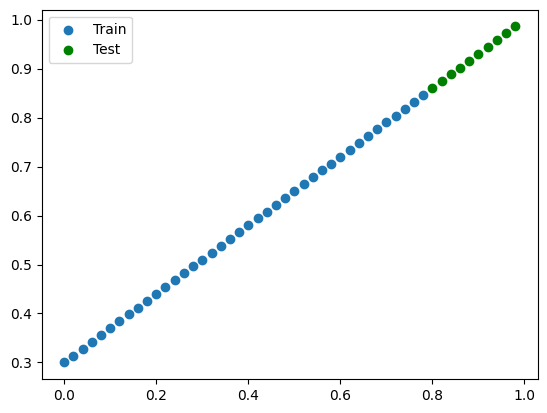

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                            requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()))
model_0.state_dict()



[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)

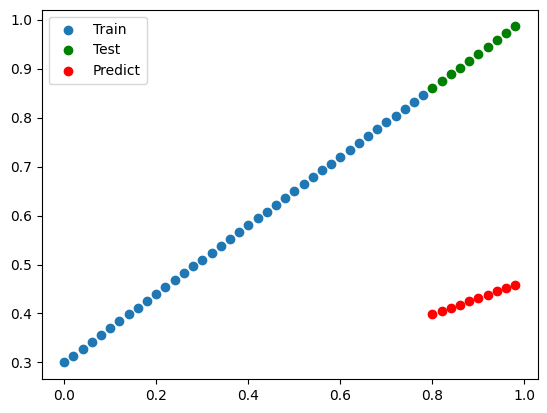

In [11]:
plot_predictions(predictions = y_preds)
# print(len(y_preds))

In [12]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [13]:
torch.manual_seed(10)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}')




Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819


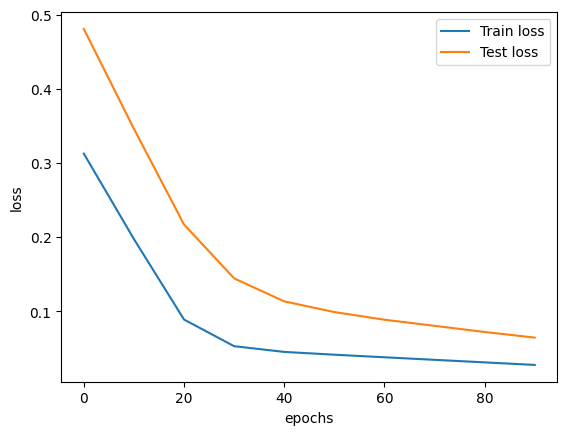

In [14]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();
plt.show()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])


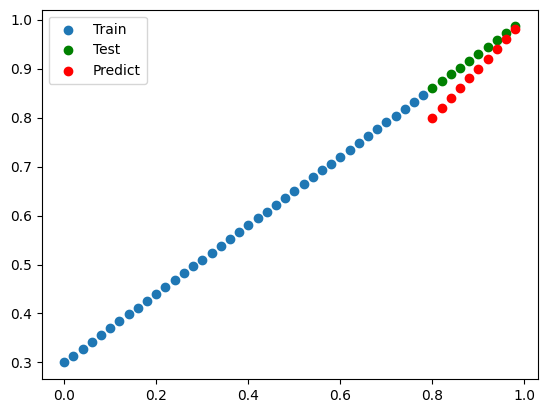

In [15]:
print(model_0.state_dict())
plot_predictions(predictions=X_test)

In [16]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [20]:
from pathlib import Path 
import os

MODEL_PATH = Path('models')

if not os.path.exists(MODEL_PATH):
    MODEL_PATH.mkdir(parents=True, exist_ok=True)
else:
    MODEL_NAME = 'model_0.pth'
    MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

    torch.save(obj=model_0.state_dict(),
            f=MODEL_SAVE_PATH)


In [21]:
!ls -l models

total 8
-rw-r--r--  1 isaigordeev  staff  1063 Feb 19 17:13 model_0.pth


In [24]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

Parameter containing:
tensor([0.5784], requires_grad=True)


In [25]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0 = loaded_model_0(X_test)
y_preds == loaded_model_0

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])